C:\Users\bachu\AppData\Local\Temp\ipykernel_24068\3619310008.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna('No review', inplace=True)
C:\Users\bachu\AppData\Local\Temp\ipykernel_24068\3619310008.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

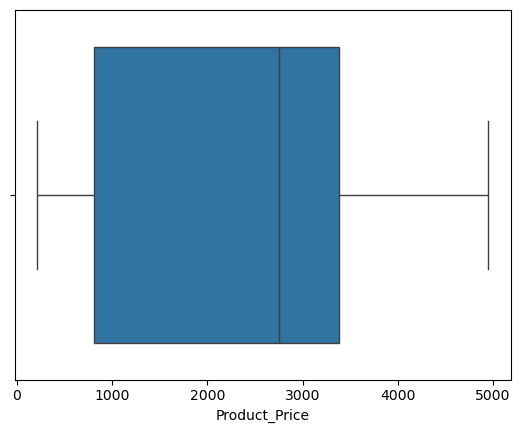

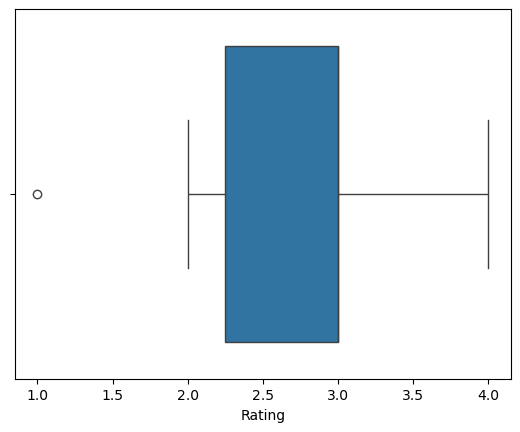

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,1,8.090402,58.0,3.0,Would not recommend,2023-01-01
1,2,1,5.370638,20.0,3.0,Excellent product!,2023-01-02
2,3,3,8.140316,51.0,2.0,Value for money,2023-01-03
4,5,2,7.713338,32.0,4.0,Not as expected,2023-01-05
5,6,0,8.507749,42.0,1.0,Fast delivery,2023-01-06


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('E-Commerce_Data.csv')
df['Review_Text'].fillna('No review', inplace=True)

# Handle missing Rating and Customer_Age with median imputation
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)

# Step 2: Detect and Remove Duplicates
# Remove duplicate reviews based on 'Review_Text' column
df.drop_duplicates(subset=['Review_Text'], keep='first', inplace=True)

# Step 3: Handle Inconsistent Data
# Standardize Rating values to ensure they are between 1 and 5
df['Rating'] = df['Rating'].clip(lower=1, upper=5)

# Correct common spelling inconsistencies in Product_Category
df['Product_Category'] = df['Product_Category'].replace({'eletronics': 'electronics'})

# Step 4: Identify and Handle Outliers
# Boxplot to check for outliers in Product_Price
sns.boxplot(x=df['Product_Price'])
plt.show()

# Boxplot to check for outliers in Rating
sns.boxplot(x=df['Rating'])
plt.show()

# Apply log transformation to Product_Price to reduce skewness if needed
df['Product_Price'] = np.log1p(df['Product_Price'])

# Step 5: Prepare Cleaned Data for Analysis
# Convert Product_Category to numerical values using LabelEncoder
le = LabelEncoder()
df['Product_Category'] = le.fit_transform(df['Product_Category'])

# Step 6: Save the Final Cleaned Dataset
df.to_csv('cleaned_customer_reviews.csv', index=False)

# Output the cleaned dataset (optional)
df.head()
